In [1]:
%%HTML
<link rel="stylesheet" type="text/css" href="css/custom.css">

# Supplementary notebook for the webinar

This notebook contains Python code in detail to produce the graphs and other materials displayed in the slides

In [2]:
#main imports
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib import dates
import datetime

from sklearn.linear_model import LinearRegression

%matplotlib inline 

In [3]:
air_df = pd.read_csv('data/weekly_aqi.csv', index_col='date_local', parse_dates=True)
air_df.head()

,aqi
date_local,
2005-06-05,4.129268
2005-06-12,4.072525
2005-06-19,4.237064
2005-06-26,4.500022
2005-07-03,4.573794


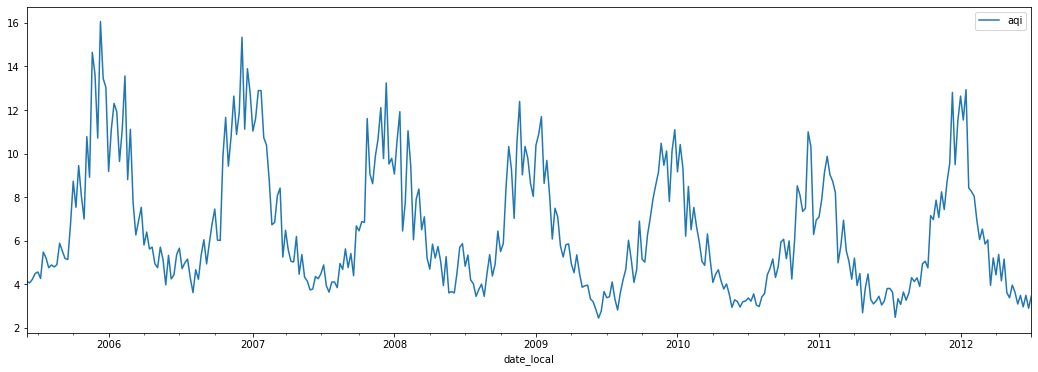

In [4]:
air_df.plot(figsize=(18,6));

# Future vs Past Anomalies



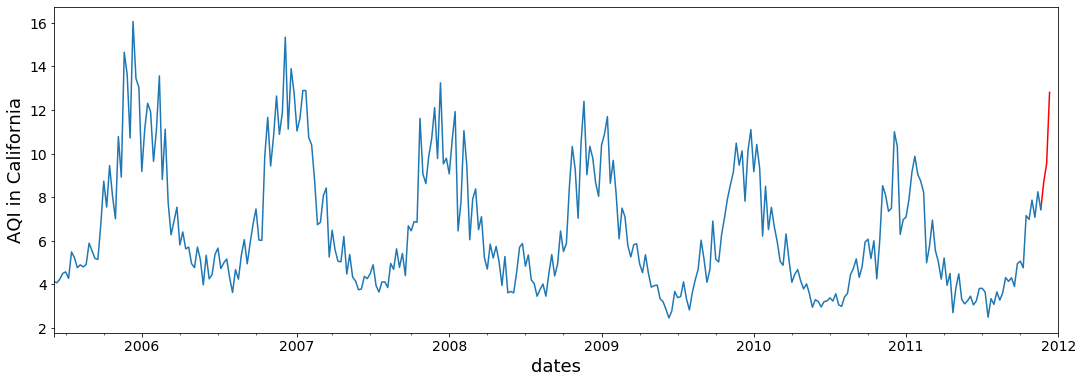

In [5]:
#future anomaly

fig, ax = plt.subplots(figsize=(18,6))

(
    air_df
    .loc['2011-11-20':'2011-12-15']
    .plot(ax=ax, legend=False, color='r')
)

(
    air_df
    .loc[:'2011-11-20']
    .plot(ax=ax, legend=False)
)

ax.set_xlim([datetime.date(2005, 6, 5), datetime.date(2012, 1, 1)])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)

fig.savefig('images/future_anomaly.png')

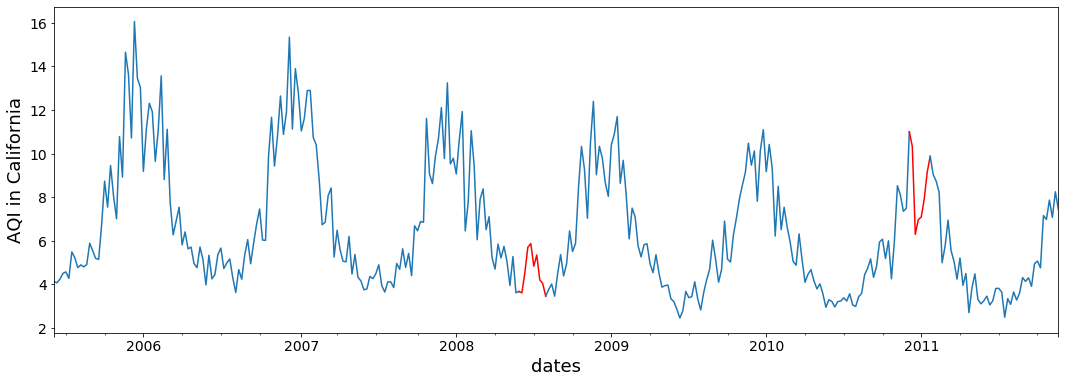

In [6]:
#past anomaly

fig, ax = plt.subplots(figsize=(18,6))

(
    air_df
    .loc[:'2008-06-01']
    .plot(ax=ax, legend=False)
)

(
    air_df
    .loc['2008-06-01':'2008-08-03']
    .plot(ax=ax, legend=False, color='r')
)

(
    air_df
    .loc['2008-08-03':'2010-12-05']
    .plot(ax=ax, legend=False, color='#1f77b4')
)

(
    air_df
    .loc['2010-12-05':'2011-01-23']
    .plot(ax=ax, legend=False, color='r')
)

(
    air_df
    .loc['2011-01-23':'2011-11-20']
    .plot(ax=ax, legend=False, color='#1f77b4')
)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)

fig.savefig('images/past_anomaly.png')

# Rule-based approach

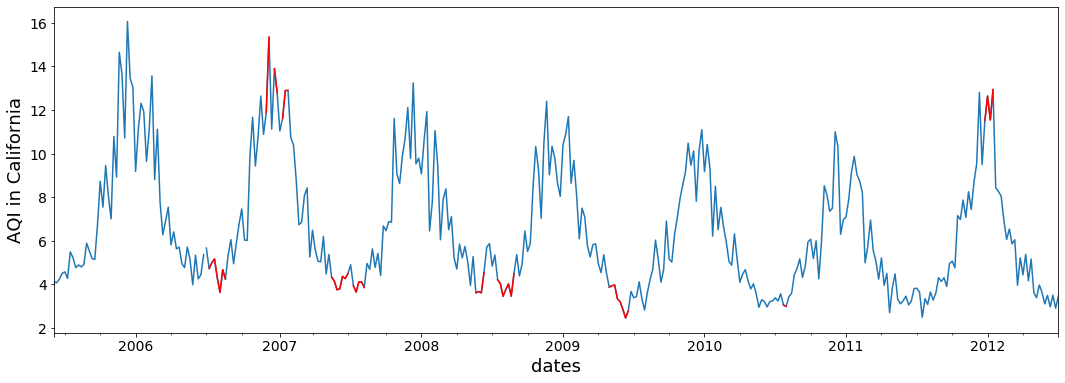

In [7]:
#alarm if approaching historical maximum / minimum by more than 30%
fig, ax = plt.subplots(figsize=(18,6))

pltr = (
    air_df
    .assign(cummax = lambda df: df['aqi'].cummax().shift(1),
            cummin = lambda df: df['aqi'].cummin().shift(1),
            alarm = lambda df: np.where((df['aqi']>0.7*df['cummax']) | (df['aqi']<1.3*df['cummin']), True, False),
            anomalies = lambda df: np.where(df['alarm'], df['aqi'], np.nan))
)

(
    pltr
    .loc[:'2006-07-01']
    [['aqi']]
    .plot(ax=ax, legend=False)
)

(
    pltr
    .loc['2006-07-01':]
    [['aqi','anomalies']]
    .plot(ax=ax, legend=False, color=['#1f77b4','r'])
);

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18);

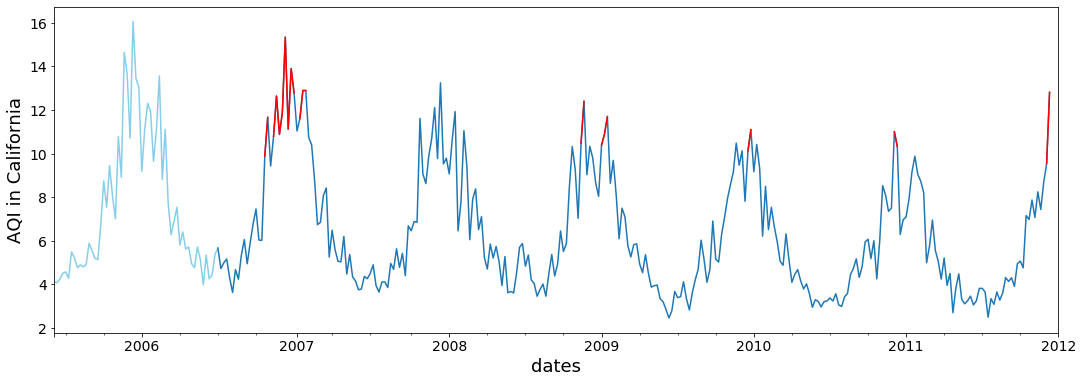

In [8]:
#alarm if above 80% quantile so far
fig, ax = plt.subplots(figsize=(18,6))

pltr = (
    air_df
    .loc[:'2011-12-15']
    .assign(quantile80 = lambda df: df.expanding()['aqi'].quantile(.8),
            alarm = lambda df: np.where((df['aqi']>df['quantile80']), True, False),
            anomalies = lambda df: np.where(df['alarm'], df['aqi'], np.nan))
)

(
    pltr
    .loc[:'2006-07-05']
    [['aqi']]
    .plot(ax=ax, legend=False, c='skyblue')
)

(
    pltr
    .loc['2006-07-01':]
    [['aqi','anomalies']]
    .plot(ax=ax, legend=False, color=['#1f77b4','r'])
);

ax.set_xlim([datetime.date(2005, 6, 5), datetime.date(2012, 1, 1)])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)
#ax.set_title('values exceeding cumulative 80% quantiles after year 1', fontsize=18);

fig.savefig('images/rule_based1.png')

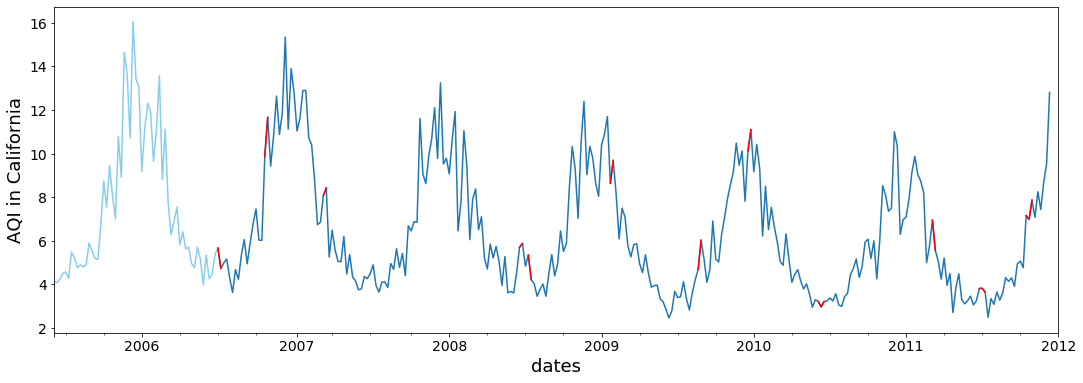

In [9]:
#alarm if more than 10% above last year's weekly value
fig, ax = plt.subplots(figsize=(18,6))

pltr = (
    air_df
    .loc[:'2011-12-15']
    .assign(alarm = lambda df: np.where((df['aqi']>1.1*df['aqi'].shift(52)), True, False),
            anomalies = lambda df: np.where(df['alarm'], df['aqi'], np.nan))
)

(
    pltr
    .loc[:'2006-07-05']
    [['aqi']]
    .plot(ax=ax, legend=False, c='skyblue')
)

(
    pltr
    .loc['2006-07-01':]
    [['aqi','anomalies']]
    .plot(ax=ax, legend=False, color=['#1f77b4','r'])
);

ax.set_xlim([datetime.date(2005, 6, 5), datetime.date(2012, 1, 1)])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)

fig.savefig('images/rule_based2.png')

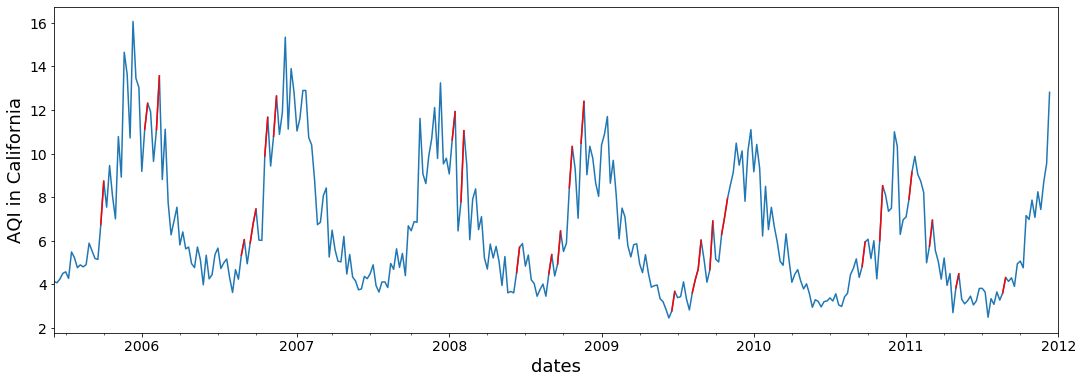

In [10]:
#alarm if more than 10% above last week's value
fig, ax = plt.subplots(figsize=(18,6))

pltr = (
    air_df
    .loc[:'2011-12-15']
    .assign(alarm = lambda df: np.where((df['aqi']>1.1*df['aqi'].shift(1)), True, False),
            anomalies = lambda df: np.where(df['alarm'], df['aqi'], np.nan))
)

(
    pltr
    [['aqi','anomalies']]
    .plot(ax=ax, legend=False, color=['#1f77b4','r'])
);

ax.set_xlim([datetime.date(2005, 6, 5), datetime.date(2012, 1, 1)])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)

fig.savefig('images/rule_based3.png')

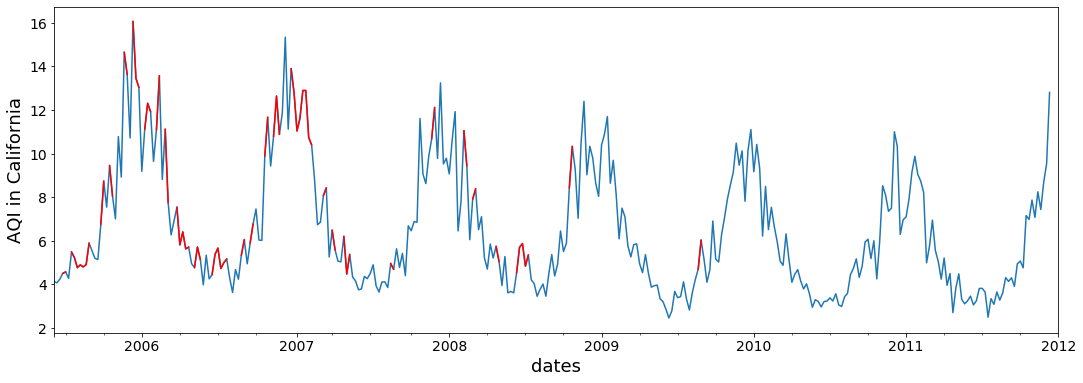

In [11]:
#alarm if more than 10% above seasonal monthly value
fig, ax = plt.subplots(figsize=(18,6))

pltr = (
    air_df
    .loc[:'2011-12-15']
    .assign(month = lambda df: df.index.month,
            monthly_average = lambda df: df.groupby("month")['aqi'].transform(np.mean),
            alarm = lambda df: np.where((df['aqi']>1.1*df['monthly_average']), True, False),
            anomalies = lambda df: np.where(df['alarm'], df['aqi'], np.nan))
)

(
    pltr
    [['aqi','anomalies']]
    .plot(ax=ax, legend=False, color=['#1f77b4','r'])
);

ax.set_xlim([datetime.date(2005, 6, 5), datetime.date(2012, 1, 1)])
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)

fig.savefig('images/rule_based4.png')

# Error-Trend-Seasonality decomposition for anomaly detection

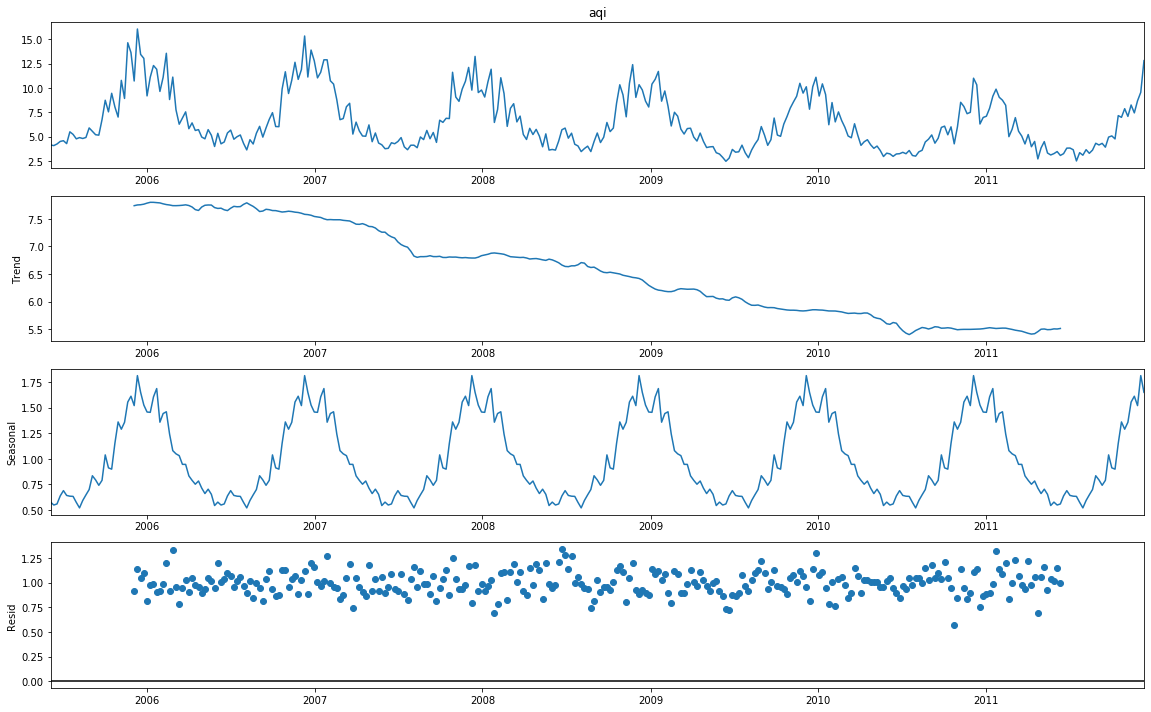

In [12]:
#ETS decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

Decomposition = seasonal_decompose(air_df['aqi'].loc[:'2011-12-15'], model='multiplicative')  
# model='additive' is an alternative

with plt.rc_context():
    plt.rc("figure", figsize=(16,10))
    Decomposition.plot();

Fitted n-dist parameters are: mu=1.000, std=0.124


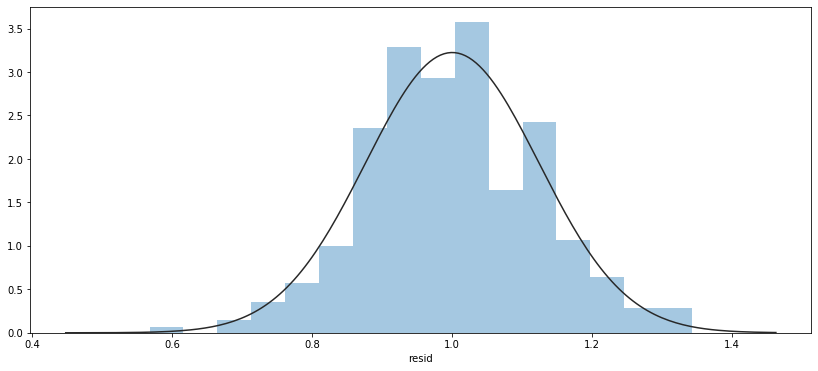

In [13]:
#fitting normal distribution over the residuals
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(14,6))

# Fit a normal distribution to the residuals:
mu, std = norm.fit(Decomposition.resid[~np.isnan(Decomposition.resid)])
print(f"Fitted n-dist parameters are: mu={mu:.3f}, std={std:.3f}")

sns.distplot(Decomposition.resid, fit=norm, kde=False, ax=ax);

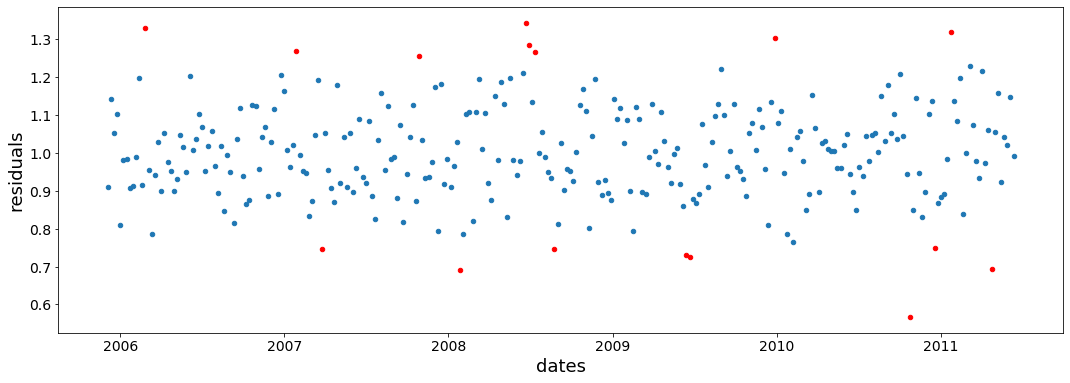

In [14]:
#identifying outliers outside of 2 std-s
lower = mu - std*2
upper = mu + std*2

pltr = (
    Decomposition.resid
    .dropna()
    .reset_index()
    .assign(outlier = lambda df: np.where((df['resid'] < lower) | (df['resid'] > upper), True, False))
)
    
fig, ax = plt.subplots(figsize=(18,6))
    
pltr[pltr.outlier==False].plot('date_local', 'resid', kind='scatter', c='#1f77b4', ax=ax)
pltr[pltr.outlier].plot('date_local', 'resid', kind='scatter', c='r', ax=ax)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('residuals', fontsize=18)

fig.savefig('images/resid_outlier.png')

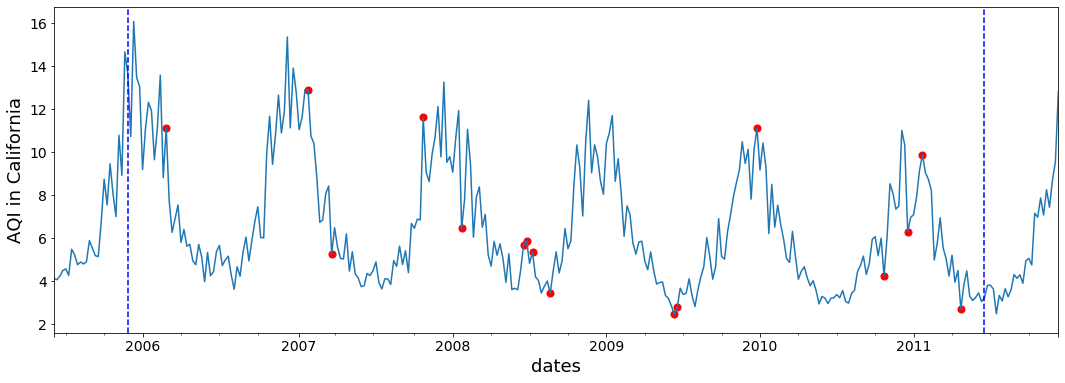

In [15]:
#marking outliers on the time series
fig, ax = plt.subplots(figsize=(18,6))

(
    air_df
    .loc[:'2011-12-15']
    .plot(ax=ax, legend=False)
)


outliers_df = pltr.merge(air_df.reset_index())

outliers_df[outliers_df.outlier].plot('date_local', 'aqi', kind='scatter', c='r', s = 50, ax=ax)

ax.axvline(x='2005-11-27', linestyle="dashed", c='b')
ax.axvline(x='2011-06-19', linestyle="dashed", c='b')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)

fig.savefig('images/resid_outlier_combined.png')

# Using long-term forecasting models

In [16]:
#importing Prophet & preparing data for it
from fbprophet import Prophet

plt.rcParams["font.size"] = 18
plt.rcParams['figure.figsize'] = (18.0, 6.0)

air_pr = (air_df
            .rename(columns={'aqi': 'y'})
            .assign(ds = lambda df: df.index)  #Prohet needs a 'ds' column with timestamps
           )

#train-test split
air_pr_train = air_pr.loc[:'2011 Jun']
air_pr_test = air_pr.loc['2011 Jul':]

Importing plotly failed. Interactive plots will not work.


In [17]:
#prophet forecasting
model = Prophet(seasonality_mode='multiplicative')
model.fit(air_pr_train)

future = model.make_future_dataframe(periods=53, freq='W') 
forecast = model.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


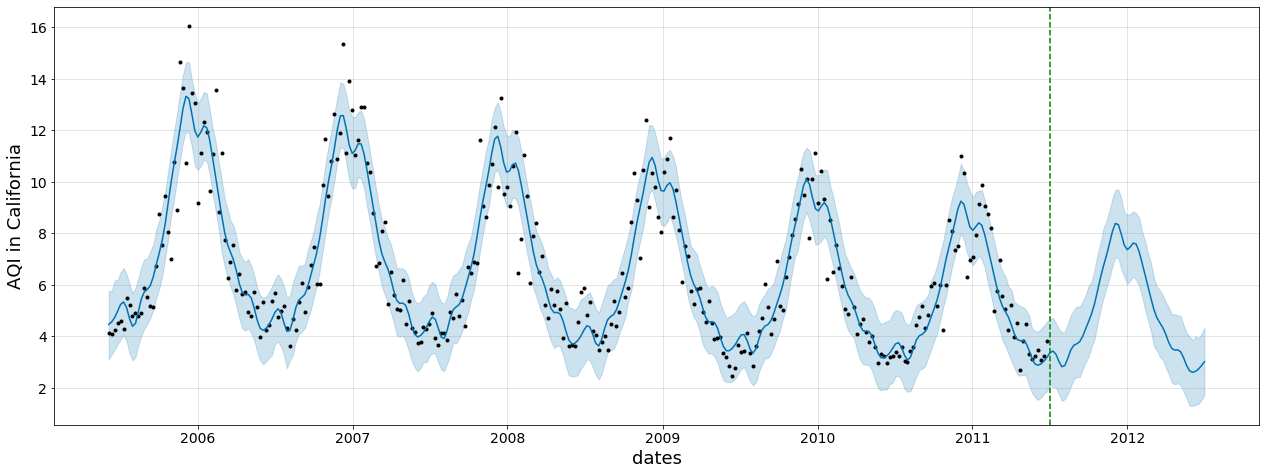

In [18]:
fig, ax = plt.subplots(figsize=(18,7))

model.plot(forecast, ax=ax)

#air_pr_test.plot('ds', 'y', kind='scatter', c='g', ax=ax, label='actual future values')

ax.axvline(x=pd.Timestamp('2011-07-03 00:00:00'), linestyle="dashed", c='g')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)

fig.savefig('images/prophet1.png')

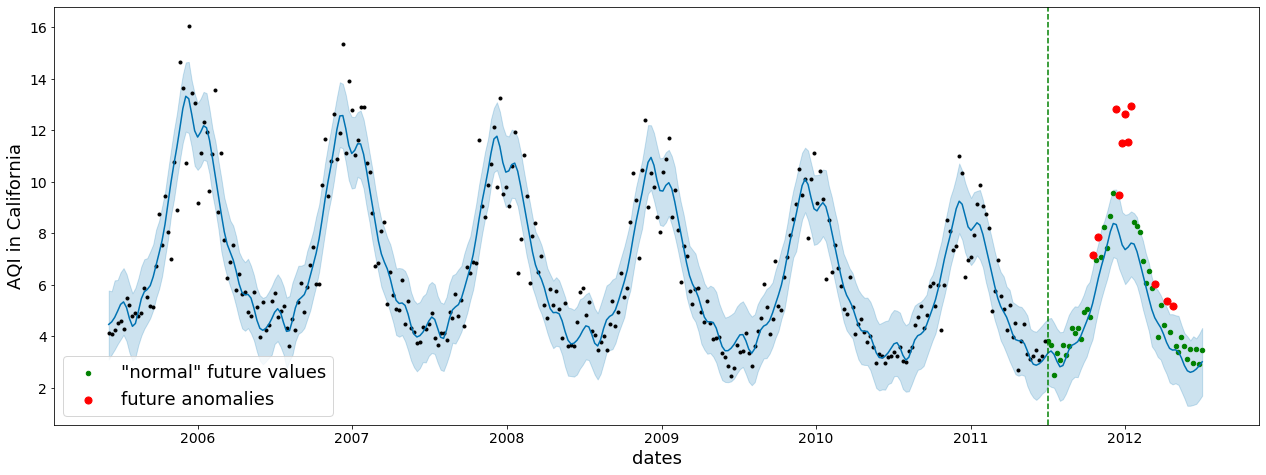

In [19]:
#marking outliers

outliers = (forecast
            .set_index(air_pr.index)
            .assign(y_real=air_pr['y'],
                    outlier = lambda df:
                    df.apply(lambda row :
                             np.nan if (row['yhat_lower'] <= row['y_real'] <= row['yhat_upper']) 
                             else row['y_real'], axis = 1)
                   )
        )

fig, ax = plt.subplots(figsize=(18,7))
model.plot(forecast, ax=ax);

air_pr_test.plot('ds', 'y', kind='scatter', c='g', ax=ax, label='"normal" future values')

ax.axvline(x=pd.Timestamp('2011-07-03 00:00:00'), linestyle="dashed", c='g')

outliers.loc['2011 Jul':].plot('ds', 'outlier', ax=ax, c='red', kind='scatter', s = 50, label = 'future anomalies')

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)

fig.savefig('images/prophet2.png')

In [20]:
from sklearn.metrics import mean_squared_error

y_test = air_pr_test['y']
y_pred = forecast.loc[forecast['ds']>='2011 Jul']['yhat']
y_test_aver = round(y_test.mean(),2)
MSE = round(mean_squared_error(y_test, y_pred),2)
RMSE = round(np.sqrt(MSE),3)

print(f'RMSE: {RMSE}, {round(100*RMSE/y_test_aver,1)}% of the test set average')

RMSE: 1.64, 28.0% of the test set average


# Using short-term forecasting models

In [21]:
#LSTM

In [22]:
#splitting data for LSTM
# lstms will predict one Y based on a number of Xs before it
import numpy as np

n_steps = 4
n_features = 1

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

X, y = split_sequence(air_pr_train['y'].values, n_steps)

In [23]:
# reshape from [samples, timesteps] into [samples, timesteps, features]

X = X.reshape((X.shape[0], X.shape[1], n_features))

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

# define model
model = Sequential()
model.add(LSTM(50, input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/Users/vadim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/vadim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/vadim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/vadim/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

In [25]:
#fitting model

# fit model
model.fit(X, y, epochs=200, verbose=0)

Instructions for updating:
Use tf.cast instead.


In [26]:
#making predictions

X_real, y_real = split_sequence(air_df['aqi'].values, n_steps)

yhat = list()

for x_input in X_real:
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat_current = model.predict(x_input)
    yhat.append(yhat_current[0][0])
    
yhat = [np.nan]*n_steps + yhat

In [27]:
#computing cumulative std, bounds and anomaly flags
air_df['y_lstm'] = yhat

air_df = (
    air_df
    .assign(date = lambda df: df.index,
            y_lstm_exp_mean = lambda df: df['y_lstm'].expanding().mean(),
            y_lstm_exp_std = lambda df: df['y_lstm'].expanding().std(),
            y_lstm_upper = lambda df: df['y_lstm'] + df['y_lstm_exp_std'],
            y_lstm_lower = lambda df: df['y_lstm'] - df['y_lstm_exp_std'],
            anomaly_pos = lambda df: np.where((df['date'] > pd.Timestamp('2011-07-03 00:00:00')) &
                    ((df['aqi'] - df['y_lstm_upper'] > 0)), 1, 0),
            anomaly_neg = lambda df: np.where((df['date'] > pd.Timestamp('2011-07-03 00:00:00')) &
                    ((df['aqi'] - df['y_lstm_lower'] < 0)), 1, 0),
            anomaly = lambda df: df['anomaly_pos']+df['anomaly_neg'])
)

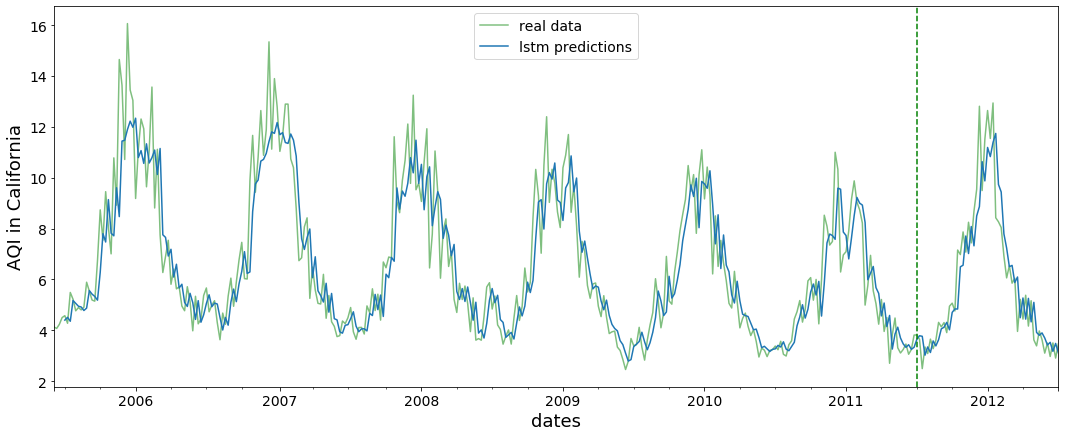

In [28]:
#plotting original data vs lstm predictions
fig, ax = plt.subplots(figsize = (18,7))

air_df[['aqi']].plot(ax=ax, c = 'green', alpha = 0.5)
air_df[['y_lstm']].plot(ax=ax)
ax.axvline(x=pd.Timestamp('2011-07-03 00:00:00'), linestyle="dashed", c='g')
ax.legend(["real data", "lstm predictions"], fontsize = 14)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)

fig.savefig('images/lstm1.png')

In [29]:
#lstm evaluation

y_test = air_df.loc['2011 Jul':]['aqi']
y_pred = air_df.loc['2011 Jul':]['y_lstm']
y_test_aver = round(y_test.mean(),2)
MSE = round(mean_squared_error(y_test, y_pred),2)
RMSE = round(np.sqrt(MSE),3)

print(f'RMSE: {RMSE}, {round(100*RMSE/y_test_aver,1)}% of the test set average')

RMSE: 1.158, 19.8% of the test set average


/Users/vadim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: The handle <matplotlib.lines.Line2D object at 0x1226080b8> has a label of '_nolegend_' which cannot be automatically added to the legend.


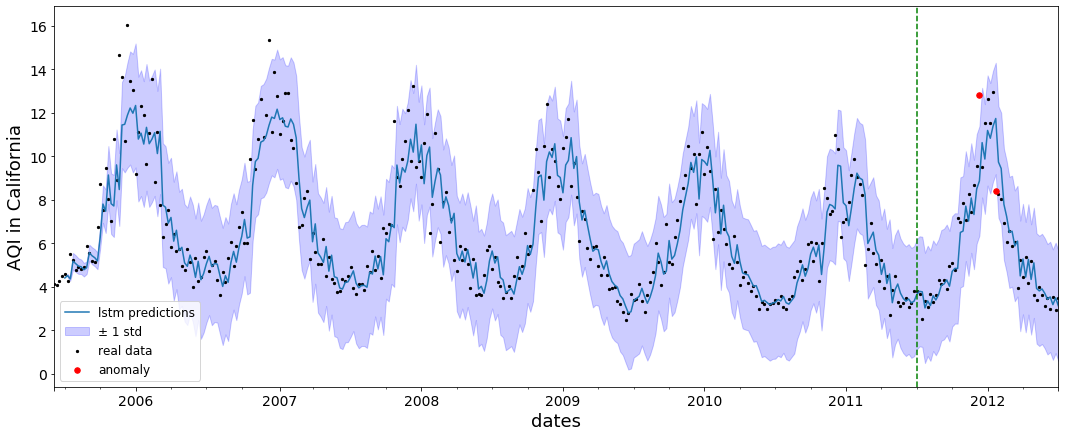

In [30]:
#illustrating detected anomalies
dates = air_df['date'].values
lower = air_df['y_lstm_lower'].values
upper = air_df['y_lstm_upper'].values

fig, ax = plt.subplots(figsize = (18,7))

air_df[['y_lstm']].plot(ax=ax)

plt.fill_between(dates, lower, upper, color = 'blue', alpha = 0.2)
ax.axvline(x=pd.Timestamp('2011-07-03 00:00:00'), linestyle="dashed", c='g',  label='Inline label')
air_df[['aqi', 'date','anomaly']].loc[lambda df: df['anomaly']!=1].plot.scatter('date', 'aqi', ax=ax, c = 'k', s = 5)
air_df[['aqi', 'date','anomaly']].loc[lambda df: df['anomaly']==1].plot.scatter('date', 'aqi', ax=ax, c = 'r', s = 30)



ax.legend(["lstm predictions", "_nolegend_", "± 1 std", "real data", "anomaly"], fontsize=12)

ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.set_xlabel('dates', fontsize=18)
ax.set_ylabel('AQI in California', fontsize=18)

fig.savefig('images/lstm2.png')